In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [5]:
df = pd.read_csv("anemia.csv")
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [6]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

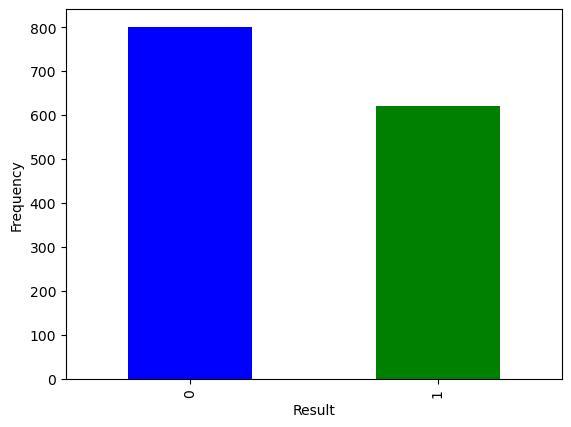

In [12]:
results = df["Result"].value_counts()
results.plot(kind = "bar", color = ["blue","green"])
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.show()

In [24]:
from sklearn.utils import resample
major_class = df[df["Result"] == 0]
minor_class = df[df["Result"] == 1]

major_downsample = resample(major_class, replace = False, n_samples = len(minor_class), random_state = 10)

df = pd.concat([major_downsample, minor_class])
print(df["Result"].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


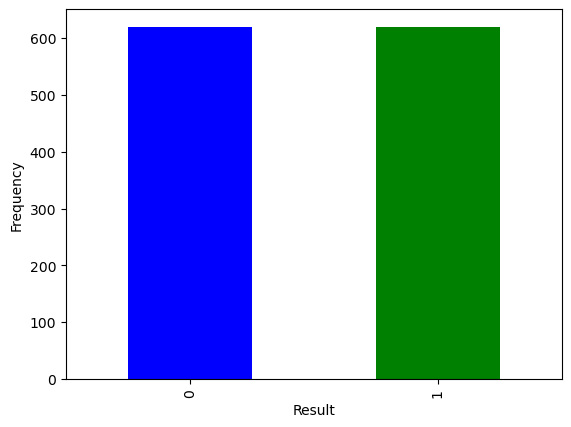

In [26]:
bal_result = df["Result"].value_counts()
bal_result.plot(kind = "bar", color = ["blue", "green"])
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.show()

In [28]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,0.531452,13.211855,22.856694,30.230081,85.474274,0.500000
std,0.499211,1.976201,3.956348,1.399864,9.616888,0.500202
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.500000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.000000,22.700000,30.300000,85.300000,0.500000
75%,1.000000,14.900000,26.000000,31.400000,93.900000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


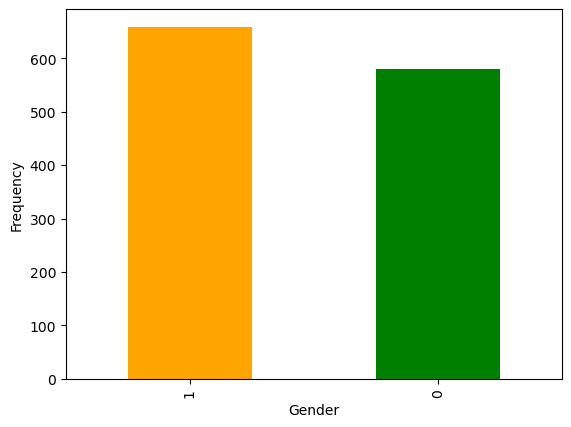

In [30]:
output = df["Gender"].value_counts()
output.plot(kind = "bar", color = ["orange", "green"])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

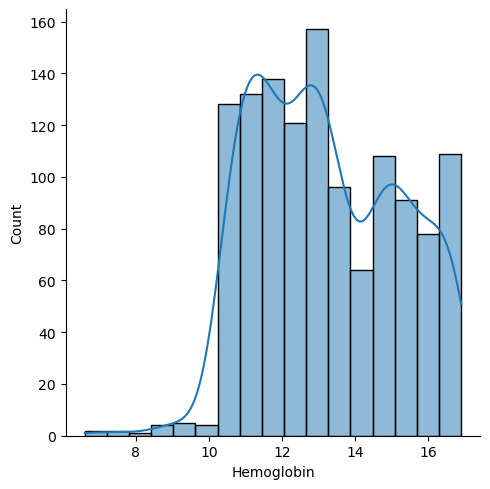

In [32]:
sb.displot(df["Hemoglobin"], kde = True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_13472\2856719748.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sb.barplot(y=df["Hemoglobin"], x = df["Gender"], hue = df["Result"], ci = None)


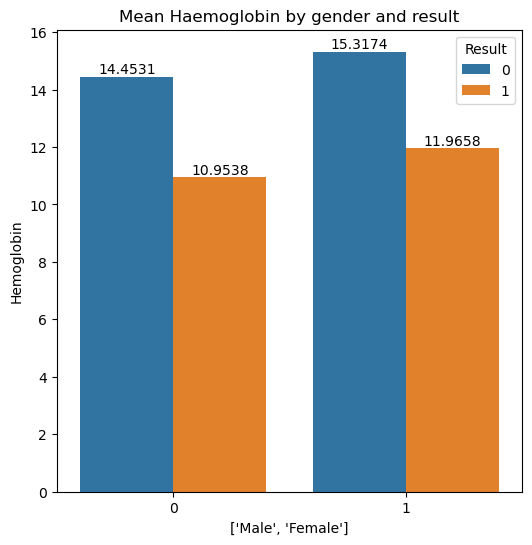

In [34]:
plt.figure(figsize = (6,6))
ax = sb.barplot(y=df["Hemoglobin"], x = df["Gender"], hue = df["Result"], ci = None)
ax.set(xlabel = ["Male", "Female"])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Mean Haemoglobin by gender and result")
plt.show()

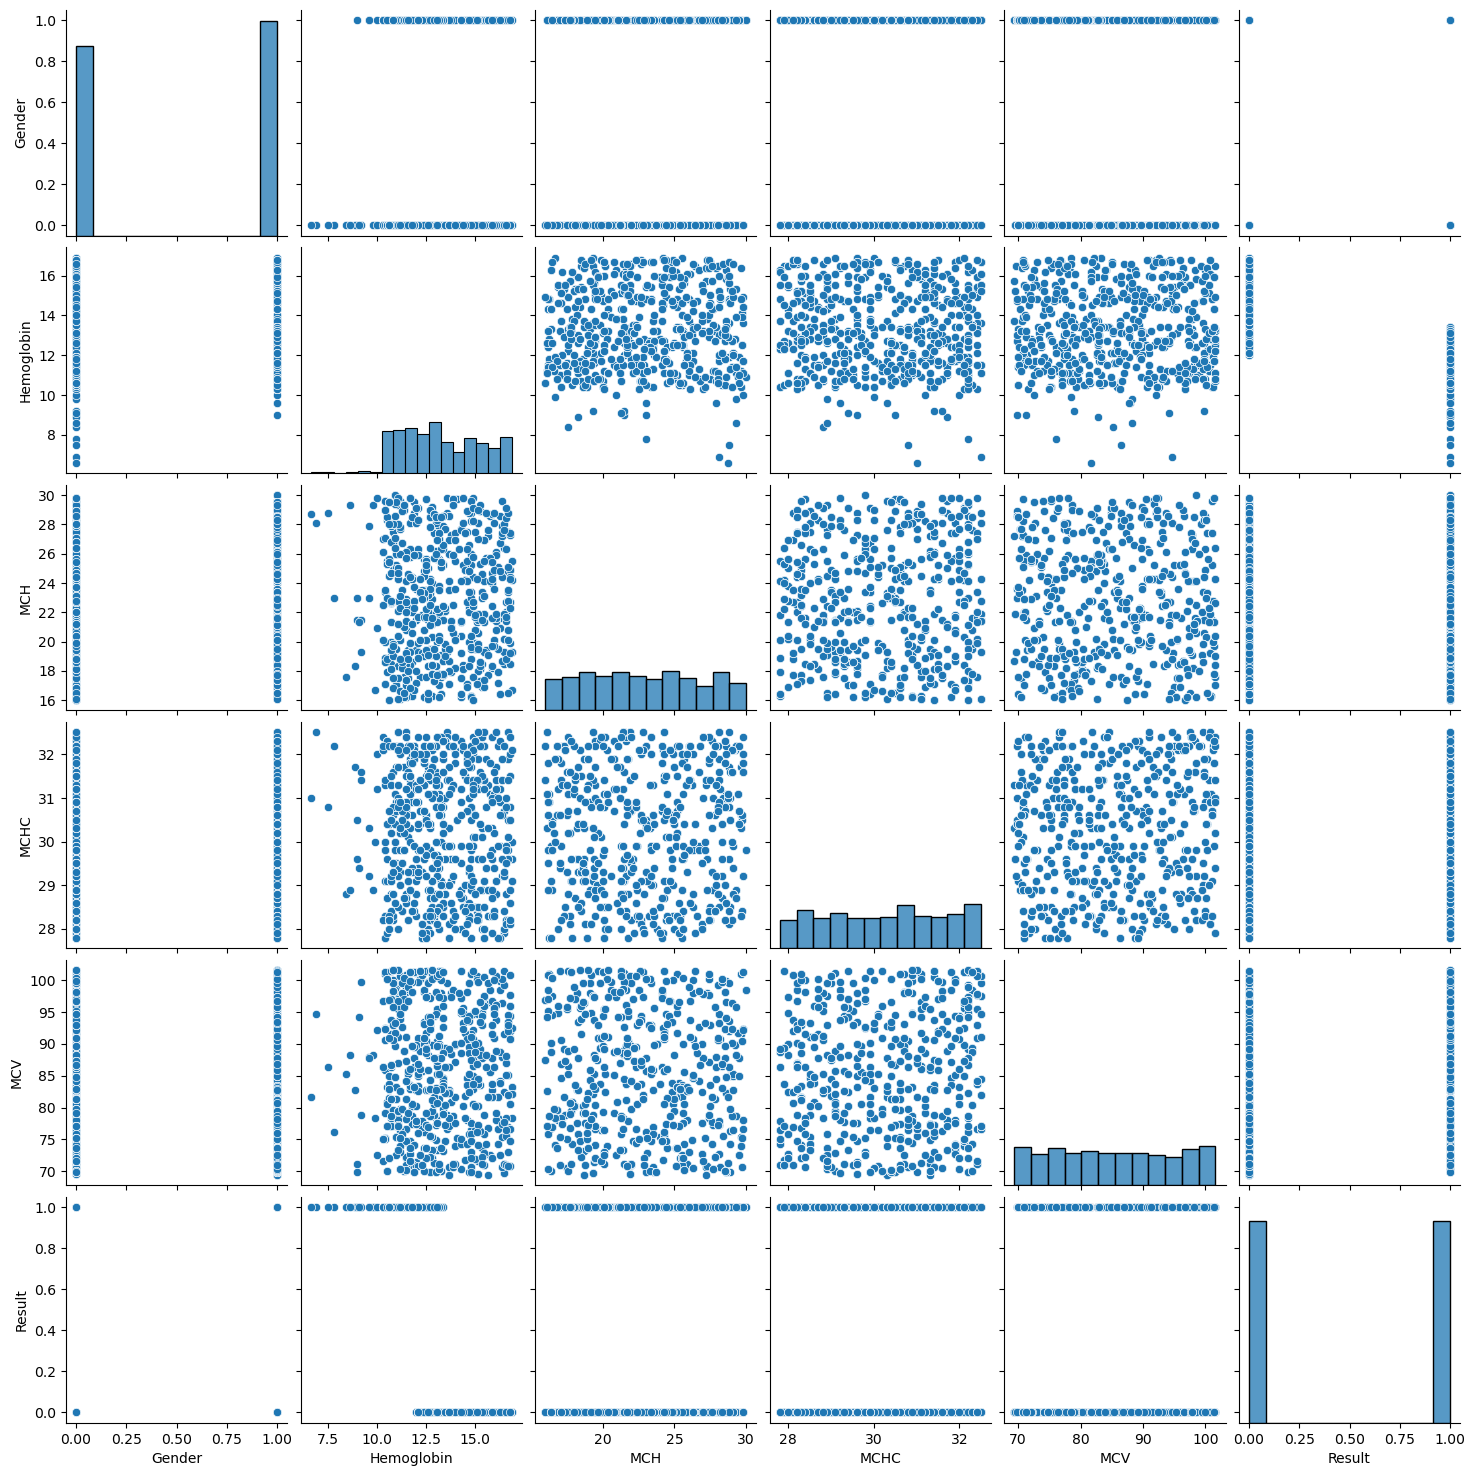

In [36]:
sb.pairplot(df)

TypeError: get() missing 1 required positional argument: 'obj'

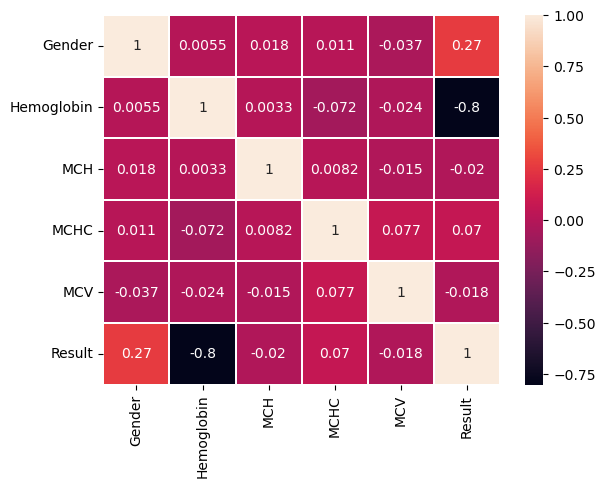

In [42]:
sb.heatmap(df.corr(), annot = True, linewidths = 0.2)
fig = plt.get()
fig.set_size_inches(10, 8)
plt.show()

In [80]:
x = df.drop("Result", axis = "columns")
y = df.Result

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 5)
(248, 5)
(992,)
(248,)


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
sc_l = lr.score(x_test, y_test)
cr_l = classification_report(y_test, y_pred)
print("Acuracy score:", sc)
print(cr)

Acuracy score: 0.9879032258064516
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       140
           1       0.97      1.00      0.99       108

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
sc_rf = rf.score(x_test, y_test)
cr_rf = classification_report(y_test,y_pred)
print("Acuracy score:", sc_rf)
print(cr_rf)

Acuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       108

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [84]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

sc_dt = dt.score(x_test, y_test)
cr_dt = classification_report(y_test, y_pred)
print("Acuracy score:", sc_dt)
print(cr_dt)

Acuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       108

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [68]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

sc_gnb = gnb.score(x_test, y_test)
cr_gnb = classification_report(y_test, y_pred)
print("Acuracy score:", sc_gnb)
print(cr_gnb)

Acuracy score: 0.9475806451612904
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       140
           1       0.91      0.97      0.94       108

    accuracy                           0.95       248
   macro avg       0.95      0.95      0.95       248
weighted avg       0.95      0.95      0.95       248



In [72]:
from sklearn.svm import SVC
s = SVC()
s.fit(x_train, y_train)
y_pred = s.predict(x_test)

sc_s = s.score(x_test, y_test)
cr_s = classification_report(y_test, y_pred)
print("Acuracy score:", sc_s)
print(cr_s)

Acuracy score: 0.8669354838709677
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       140
           1       0.78      0.97      0.86       108

    accuracy                           0.87       248
   macro avg       0.88      0.88      0.87       248
weighted avg       0.89      0.87      0.87       248



In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
sc_gb = gb.score(x_test, y_test)
cr_gb = classification_report(y_test, y_pred)
print("Acuracy score:", sc_gb)
print(cr_gb)

Acuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       108

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [76]:
def result(pred):
    if pred == 0:
        print("You don't have any anemic disease.")
    else:
        print("You have anemic disease.")

In [88]:
pred = dt.predict([[0, 22, 30, 9, 74]])
result(pred)

You don't have any anemic disease.


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [94]:
model = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'Support Vector Classifier', 'Gradient Boost Classifier'],
                     'Scores':[sc_l, sc_dt, sc_rf, sc_gnb, sc_s, sc_gb]})
model

,Model,Scores
0,Linear Regression,0.987903
1,Decision Tree Classifier,1.000000
2,Random Forest Classifier,1.000000
3,Gaussian Naive Bayes,0.947581
4,Support Vector Classifier,0.866935
5,Gradient Boost Classifier,1.000000


In [96]:
import pickle
import warnings
with open("model", "wb") as f:
    pickle.dump(model, f)